<a href="https://colab.research.google.com/github/denisedacunhasilva/projeto-etl-iqvia-clamed/blob/main/Chipotle_Denise_02022026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Você é o Engenheiro de Dados da rede Chipotle. O sistema de vendas sofreu uma pane e gerou logs "sujos". O CEO, o Gerente de Estoque e o Diretor de Marketing precisam de respostas urgentes, mas o Excel não consegue processar os dados.

In [89]:
# <<<<<<<<<< ATENÇÃO!!!!!!!!!! ESTA ANÁLISE FOI REPRODUZIDA A PARTIR DA EXPLICAÇÃO DA AULA DA PROFESSORA <<<<<RAFAELA BARBOSA>>>>>>>>>>>>>>>
# 0 - Carregar os dados (chipotle_modificado.csv)

## Descrição: Chipotle Orders
## Contexto: Este dataset representa um log de transações de vendas da rede de fast-food mexicana Chipotle.
## Cada linha representa um item comprado, não necessariamente um pedido inteiro.
## Imagine que esta tabela é o espelho digital da "Nota Fiscal" que sai da impressora.

# Detalhes da tabela:
## COLUNA                DESCRIÇAO
## order_id              O número do cupom fiscal. Se você comprou 3 coisas, esse número se repete em 3 linhas.
## quantity	             Quantas unidades daquele item específico foram pedidas.
## item_name	           O nome principal do produto.
## choice_description	   Os detalhes/customização do pedido (molhos, acompanhamentos).
## item_price	           O valor cobrado pelo item.

'''
Logs de vendas
A coluna order_id se repete, em algum momento do dataset será necessário fazer a junção dos pedidos.
A coluna order_id está numérica e deve ser object.
A coluna quantity float e deve ser int.

'''

# <<<<<<<<<< ATENÇÃO!!!!!!!!!! ESTA ANÁLISE FOI REPRODUZIDA A PARTIR DA EXPLICAÇÃO DA AULA DA PROFESSORA <<<<<RAFAELA BARBOSA>>>>>>>>>>>>>>>

In [92]:
# Importar dataframe
import pandas as pd
df_logs = pd.read_csv('/content/sample_data/chipotle_modificado.csv')
print(f"Linhas totais: {df_logs.shape[0]}")
print(f"Colunas totais: {df_logs.shape[1]}")
print("____ Visualização primeiras linhas ____")
display(df_logs.head())



Linhas totais: 4622
Colunas totais: 5
____ Visualização primeiras linhas ____


,order_id,quantity,item_name,choice_description,item_price
0,1,1.0,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1.0,Izze,[Clementine],$3.39
2,1,1.0,Nantucket Nectar,[Apple],$3.39
3,1,1.0,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2.0,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [97]:
df_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4395 non-null   float64
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 180.7+ KB


In [ ]:
df_logs.tail()

In [94]:
df_logs.nunique()

,0
order_id,1834
quantity,9
item_name,50
choice_description,1043
item_price,78


In [95]:
df_logs.sample(5)

,order_id,quantity,item_name,choice_description,item_price
2635,1047,1.0,Steak Bowl,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream...",$11.75
4250,1696,1.0,Chips and Guacamole,NaN,$4.45
887,367,1.0,Veggie Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$8.75
1167,481,1.0,6 Pack Soft Drink,[Coke],$6.49
1115,461,1.0,Canned Soft Drink,[Diet Coke],$1.25


In [96]:
df_logs.describe()

,order_id,quantity
count,4622.000000,4395.000000
mean,927.254868,1.077361
std,528.890796,0.417989
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


Atividade 1: O Mistério do Faturamento

(Limpeza de Dados e Tipos) | Stakeholder: CEO / Financeiro.

O CEO quer saber: "Quanto vendemos no total?"

In [101]:
# Resposta ao CEO (Quanto vendemos no total?)
faturamento = df['item_price'].sum()
print(f"Faturamento total: ${faturamento:,.2f}")


Faturamento total: $34,500.16


Atividade 2: Auditoria de Estoque (Tratamento de NaNs e Estatística)

Stakeholder: Gerente de Estoque.

Precisamos repor o estoque respondendo a pergunta:

"A cada 100 vendas realizadas, quantas unidades deste produto saíram da prateleira?"

In [102]:
# 1. Diagnóstico
nulos = df['quantity'].isna().sum()
print(f"Quantidade de nulos: {nulos}")

# Quando a quantidade de nulos é menor do que 5% do total dos dados é possível analisar a exclusão destes registros. Porém se estes forem
# parte de um padrão é provável que não possa ser aconselhável aa exclusão.
# Sempre analisar o que quer excluir.
# 227 para um total de 4.226 chega muito perto de 5%, portanto foi optado por não efetuar a exclusão. Seria recomendado

Quantidade de nulos: 227


Abordagem 1: Remoção de Dados Nulos

In [103]:
# 1. Criar uma cópia do Dataframe
df_dropped = df.copy()

# 2. Remover os dados nulos da coluna quantity
df_dropped.dropna(subset=['quantity'], inplace=True)

# 3. Contagem de valores únicos da coluna order_id
total_orders_3 = df_dropped['order_id'].nunique()

# 4. Agrupar pela coluna item_name e somar a coluna quantity
itens_sold_3 = df_dropped.groupby('item_name')['quantity'].sum()
itens_sold_3.head()


,quantity
item_name,
6 Pack Soft Drink,53.0
Barbacoa Bowl,61.0
Barbacoa Burrito,88.0
Barbacoa Crispy Tacos,12.0
Barbacoa Salad Bowl,10.0


Abordagem 2: Valor fixo.

In [106]:
# 1. Criar uma cópia do Dataframe
df_fix_1 = df.copy()

# 2. Preencher valor 1 na coluna 'quantity' que esteja nulo.
# Corrigindo o FutureWarning: usar df.loc ou reatribuir para evitar o problema de cópia encadeada.
df_fix_1.loc[:, 'quantity'] = df_fix_1['quantity'].fillna(1)

# 3. Contagem de valores únicos coluna order_id
total_orders_1 = df_fix_1['order_id'].nunique()

# 4. Agrupar por item_name e somar por quantity
itens_sold_1 = df_fix_1.groupby('item_name')['quantity'].sum()

# 5. Calcular 'Itens por 100 vendas'
itens_por_100 = itens_sold_1 / total_orders_1 * 100

# 6. Criar ranking_fix_1, sort e mostre top 5
ranking_fix_1 = itens_por_100.to_frame(name = 'Itens por 100 vendas').sort_values(by='Itens por 100 vendas', ascending=False)

print(f"Total de pedidos: {total_orders_1}")
print("Top 5 itens no ranking:")
display(ranking_fix_1.head(5))

Total de pedidos: 1834
Top 5 itens no ranking:


,Itens por 100 vendas
item_name,
Chicken Bowl,41.384951
Chicken Burrito,32.061069
Chips and Guacamole,27.589967
Steak Burrito,20.937841
Canned Soft Drink,19.138495


Abordagem 3: Imputação Estatística (Mediana)

In [108]:
# 1. Criar a cópia do Dataframe.
df_median = df.copy()

# 2. Calcular a mediana da coluna quantity.
median_val = df_median['quantity'].median()
df_median['quantity'] = df_median['quantity'].fillna(median_val)

# 3. Contagem de valores únicos
total_orders_2 = df_median['order_id'].nunique()

# 4. Agrupar por item_name e somar a quantity
itens_sold_2 = df_median.groupby('item_name')['quantity'].sum()

# 5. Calculate 'Itens por 100 Vendas'
itens_por_100_orders_med = itens_sold_2 / total_orders_2 * 100

# 6. Criar ranking_median, ordenado pelos 5 maiores valores
ranking_median = itens_por_100_orders_med.to_frame(name = 'Itens por 100 vendas').sort_values(by='Itens por 100 vendas', ascending=False)

print(f"Mediana utilizada na imputação: {median_val}")
print(f"Total de pedidos: {total_orders_2}")
print("Top 5 itens no ranking (Mediana Inputada):")
display(ranking_median.head(5))


Mediana utilizada na imputação: 1.0
Total de pedidos: 1834
Top 5 itens no ranking (Mediana Inputada):


,Itens por 100 vendas
item_name,
Chicken Bowl,41.384951
Chicken Burrito,32.061069
Chips and Guacamole,27.589967
Steak Burrito,20.937841
Canned Soft Drink,19.138495


In [111]:
# 1. Calcular o ranking para a abordagem de Nulos Removidos
# 'itens_sold_3' e 'total_orders_3' já foram calculados anteriormente.
itens_por_100_orders_dropped = (itens_sold_3 / total_orders_3) * 100
ranking_dropped = itens_por_100_orders_dropped.to_frame(name='Itens por 100 vendas').sort_values(by='Itens por 100 vendas', ascending=False)

# 2. Extrair o Top 5 de cada ranking e adicionar a coluna 'Abordagem'
top5_fix_1 = ranking_fix_1.head(5).copy()
top5_fix_1['Abordagem'] = 'Valor Fixo (1)'

top5_median = ranking_median.head(5).copy()
top5_median['Abordagem'] = 'Mediana Imputada'

top5_dropped = ranking_dropped.head(5).copy()
top5_dropped['Abordagem'] = 'Nulos Removidos'

# 3. Combinar todos os rankings em um único DataFrame
combined_rankings = pd.concat([top5_fix_1, top5_median, top5_dropped])
combined_rankings.reset_index(inplace=True)
combined_rankings.rename(columns={'index': 'item_name'}, inplace=True)

# 4. Adicionar a coluna 'Estrategico'
# Para demonstração, vamos considerar os 3 itens com maior 'Itens por 100 vendas' como estratégicos no ranking combinado.
top_overall_strategic_items = combined_rankings.sort_values(by='Itens por 100 vendas', ascending=False)['item_name'].head(3).tolist()
combined_rankings['Estrategico'] = combined_rankings['item_name'].isin(top_overall_strategic_items)

print("Ranking Combinado com a coluna 'Estrategico':")
display(combined_rankings)

Ranking Combinado com a coluna 'Estrategico':


,item_name,Itens por 100 vendas,Abordagem,Estrategico
0,Chicken Bowl,41.384951,Valor Fixo (1),True
1,Chicken Burrito,32.061069,Valor Fixo (1),False
2,Chips and Guacamole,27.589967,Valor Fixo (1),False
3,Steak Burrito,20.937841,Valor Fixo (1),False
4,Canned Soft Drink,19.138495,Valor Fixo (1),False
5,Chicken Bowl,41.384951,Mediana Imputada,True
6,Chicken Burrito,32.061069,Mediana Imputada,False
7,Chips and Guacamole,27.589967,Mediana Imputada,False
8,Steak Burrito,20.937841,Mediana Imputada,False
9,Canned Soft Drink,19.138495,Mediana Imputada,False


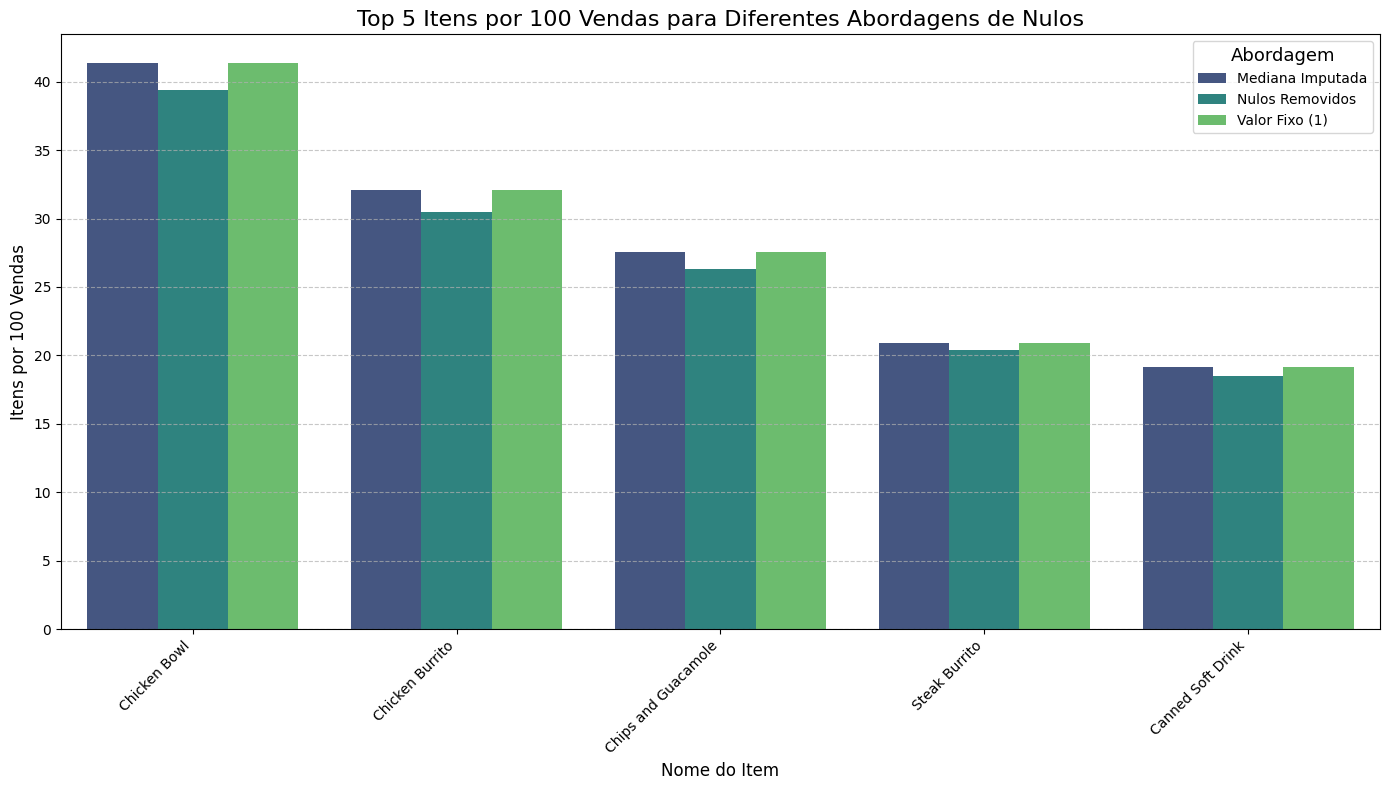

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o plot de barras agrupado
plt.figure(figsize=(14, 8))
sns.barplot(
    data=combined_rankings.sort_values(by=['Abordagem', 'Itens por 100 vendas'], ascending=[True, False]),
    x='item_name',
    y='Itens por 100 vendas',
    hue='Abordagem',
    palette='viridis'
)

plt.title('Top 5 Itens por 100 Vendas para Diferentes Abordagens de Nulos', fontsize=16)
plt.xlabel('Nome do Item', fontsize=12)
plt.ylabel('Itens por 100 Vendas', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Abordagem', title_fontsize='13', fontsize='10')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Atividade 3: O Clube VIP (Granularidade e Lógica) (Agrupamento e Feature Engineering) Stakeholder: Marketing / CRM.

A Dor do Negócio: Queremos lançar o programa "Chipotle Gold".

A regra é: Pedidos com valor total acima de R$20.00 são considerados VIP. Qual a % do nosso faturamento vem desses clientes VIP?

In [113]:
# 1. Criando a visão do PEDIDO (Granularidade correta)
df_pedidos = df.groupby('order_id')['item_price'].sum().reset_index()
df_pedidos.columns = ['order_id', 'valor_total']

# 2. Aplicando a Regra de Negócio (Feature Engineering)
# Usando np.where (muito mais rápido do que loops for)
import numpy as np
df_pedidos['categoria'] = np.where(df_pedidos['valor_total'] > 20, 'Gold', 'Standard')

# 3. Respondendo a pergunta de % (Análise)
faturamento_por_grupo = df_pedidos.groupby('categoria')['valor_total'].sum()
total_geral = faturamento_por_grupo.sum()

# Cálculo da porcentagem
porcentagem_gold = (faturamento_por_grupo['Gold'] / total_geral) * 100

print("--- Relatório de Segmentação de Clientes ---")
print(faturamento_por_grupo)
print(f"\n Conclusão: Os clientes Gold representam {porcentagem_gold:.1f}% do nosso faturamento.")

--- Relatório de Segmentação de Clientes ---
categoria
Gold        16574.18
Standard    17925.98
Name: valor_total, dtype: float64

 Conclusão: Os clientes Gold representam 48.0% do nosso faturamento.
